In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp;',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
fulldataset = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/NewsArticles - Sheet1.csv'
full_dataset = pd.read_csv(fulldataset)
full_dataset.info()
train, val = train_test_split(full_dataset, test_size=0.2, random_state=42)
train.info()
val.info()
# train_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Training.csv'
# val_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Validation.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Testing.csv'
test = pd.read_csv(test_path)
test.info()
# val = pd.read_csv(val_path)
# val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   4879 non-null   object
 1   Link          4879 non-null   object
 2   Text          4879 non-null   object
 3   Region        4879 non-null   object
 4   Origin        4839 non-null   object
 5   Binary Label  4879 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 228.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 2742 to 860
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   3903 non-null   object
 1   Link          3903 non-null   object
 2   Text          3903 non-null   object
 3   Region        3903 non-null   object
 4   Origin        3870 non-null   object
 5   Binary Label  3903 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 213.4+ KB
<class 'pa

In [ ]:
train['Text'] = train['Text'].map(lambda x: cleantext(x))
val['Text'] = val['Text'].map(lambda x: cleantext(x))
test['Text'] = test['Text'].map(lambda x: cleantext(x))

In [ ]:
import seaborn as sns
#for plotting graph

def plot_prob_distribution(probabilities, true_labels, title='Probability Distribution'):
    plt.figure(figsize=(10, 6))
    sns.histplot(probabilities[true_labels == 0], kde=True, label='Fake', color='blue')
    sns.histplot(probabilities[true_labels == 1], kde=True, label='Real', color='orange')
    plt.title(title)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))


SVM
val:
[[551  37]
 [ 24 364]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       588
           1       0.91      0.94      0.92       388

    accuracy                           0.94       976
   macro avg       0.93      0.94      0.94       976
weighted avg       0.94      0.94      0.94       976

Accuracy :  0.9375
Precison :  0.9375142453888772
Recall :  0.9375
F1 :  0.9373344198551232


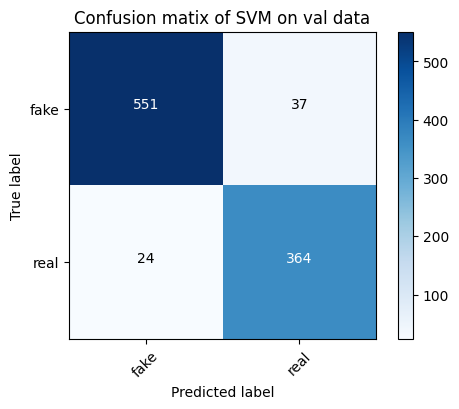

In [ ]:
#SVM
pipeline_svm = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LinearSVC())
    ])
fit_svm = pipeline_svm.fit(train['Text'],train['Binary Label'])
print('SVM')
print ('val:')
pred_svm=pipeline_svm.predict(val['Text'])
print_metrices(pred_svm,val['Binary Label'])
plot_confusion_matrix(confusion_matrix(val['Binary Label'],pred_svm),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

svm_val_misclass_df = val[pred_svm != val['Binary Label']]



Logistic Regression
val:
[[549  39]
 [ 41 347]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       588
           1       0.90      0.89      0.90       388

    accuracy                           0.92       976
   macro avg       0.91      0.91      0.91       976
weighted avg       0.92      0.92      0.92       976

Accuracy :  0.9180327868852459
Precison :  0.9181134089600012
Recall :  0.9180327868852459
F1 :  0.9180691060024136


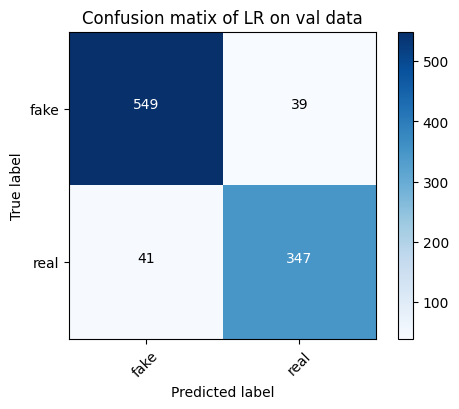

In [ ]:
#Logistic Regression
pipeline_lr = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LogisticRegression())
    ])
fit_lr = pipeline_lr.fit(train['Text'],train['Binary Label'])
print('Logistic Regression')
print ('val:')
pred_lr=pipeline_lr.predict(val['Text'])

print_metrices(pred_lr,val['Binary Label'])
plot_confusion_matrix(confusion_matrix(val['Binary Label'],pred_lr),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on val data')


Gradient Boost
val:
[[543  45]
 [ 34 354]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       588
           1       0.89      0.91      0.90       388

    accuracy                           0.92       976
   macro avg       0.91      0.92      0.92       976
weighted avg       0.92      0.92      0.92       976

Accuracy :  0.9190573770491803
Precison :  0.9189322942714352
Recall :  0.9190573770491803
F1 :  0.9188738368894879


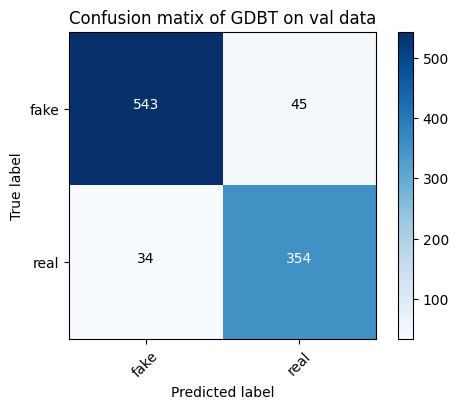

In [ ]:
#Gradient Boost
pipeline_gb = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', GradientBoostingClassifier())
    ])
fit_gb = pipeline_gb.fit(train['Text'],train['Binary Label'])
print('Gradient Boost')
print ('val:')
pred_gb=pipeline_gb.predict(val['Text'])

print_metrices(pred_gb,val['Binary Label'])
plot_confusion_matrix(confusion_matrix(val['Binary Label'],pred_gb),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on val data')

Decision Tree
val:
[[558  30]
 [ 61 327]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       588
           1       0.92      0.84      0.88       388

    accuracy                           0.91       976
   macro avg       0.91      0.90      0.90       976
weighted avg       0.91      0.91      0.91       976

Accuracy :  0.9067622950819673
Precison :  0.9101353265237142
Recall :  0.9067622950819673
F1 :  0.9075048040535902


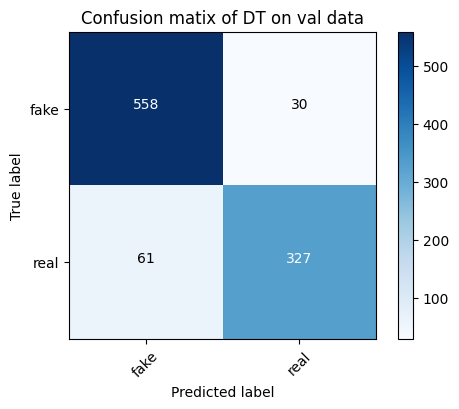

In [ ]:
#Decision Tree
pipeline_dt = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', tree.DecisionTreeClassifier())
    ])
fit_dt = pipeline_dt.fit(train['Text'],train['Binary Label'])
print('Decision Tree')
print ('val:')
pred_dt=pipeline_dt.predict(val['Text'])

print_metrices(pred_dt,val['Binary Label'])
plot_confusion_matrix(confusion_matrix(val['Binary Label'],pred_dt),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on val data')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   2437 non-null   object
 1   Link          2437 non-null   object
 2   Text          2437 non-null   object
 3   Region        2437 non-null   object
 4   Origin        2430 non-null   object
 5   Binary Label  2437 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 114.4+ KB

SVM - Testing:
[[ 574   59]
 [ 141 1663]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       633
           1       0.97      0.92      0.94      1804

    accuracy                           0.92      2437
   macro avg       0.88      0.91      0.90      2437
weighted avg       0.92      0.92      0.92      2437

Accuracy :  0.9179318834632745
Precison :  0.9174255728046323
Recall :  0.9179318834632745
F1 :  0.9163900268124482


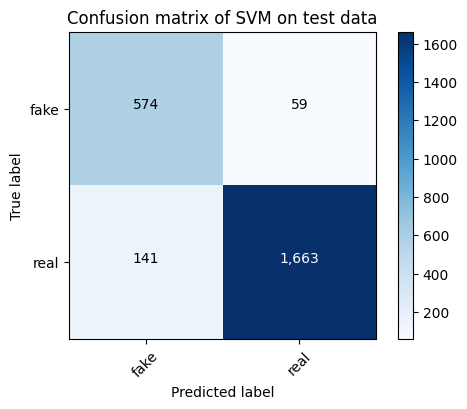

Logistic Regression - Testing:
[[ 573   60]
 [ 186 1618]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       633
           1       0.96      0.90      0.93      1804

    accuracy                           0.90      2437
   macro avg       0.86      0.90      0.88      2437
weighted avg       0.91      0.90      0.90      2437

Accuracy :  0.8990562166598277
Precison :  0.8994862547633622
Recall :  0.8990562166598277
F1 :  0.8963140211749201


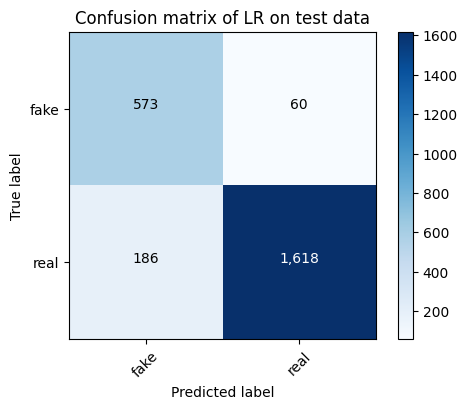

Gradient Boosting - Testing:
[[ 532  101]
 [ 159 1645]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       633
           1       0.94      0.91      0.93      1804

    accuracy                           0.89      2437
   macro avg       0.86      0.88      0.87      2437
weighted avg       0.90      0.89      0.89      2437

Accuracy :  0.8933114485022569
Precison :  0.8916116655727024
Recall :  0.8933114485022569
F1 :  0.8918461549501985


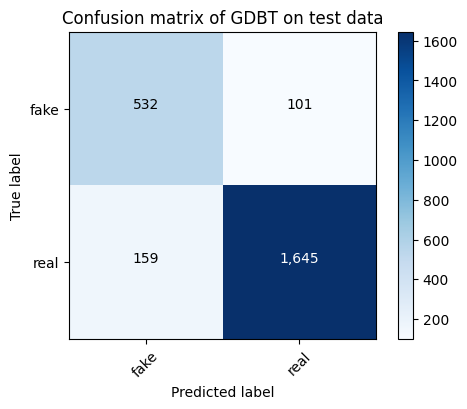

Decision Tree - Testing:
[[ 558   75]
 [ 251 1553]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       633
           1       0.95      0.86      0.91      1804

    accuracy                           0.87      2437
   macro avg       0.82      0.87      0.84      2437
weighted avg       0.89      0.87      0.87      2437

Accuracy :  0.8662289700451374
Precison :  0.8677204449361215
Recall :  0.8662289700451374
F1 :  0.8614954384542172


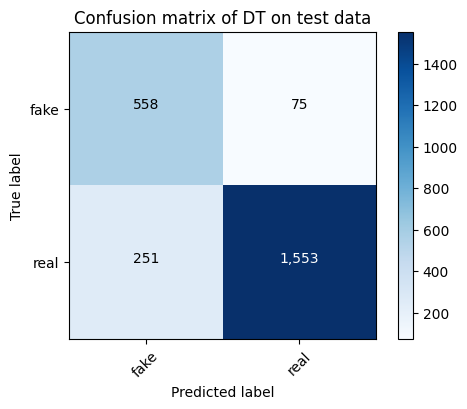

In [ ]:
# Load testing data
# test_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Testing.csv'
# test = pd.read_csv(test_path)

# Preprocess testing data
test_path = '/content/drive/MyDrive/Colab Notebooks/COVID19-FNIR/Testingset.csv'
test = pd.read_csv(test_path)
test.info()
test['Text'] = test['Text'].map(lambda x: cleantext(x))


# SVM Model Testing
print('\nSVM - Testing:')
test_pred = pipeline_svm.predict(test['Text'])
print_metrices(test_pred, test['Binary Label'])
plot_confusion_matrix(confusion_matrix(test['Binary Label'], test_pred), target_names=['fake', 'real'],
                      normalize=False, title='Confusion matrix of SVM on test data')

# Save the predictions on the test set to an Excel file
test_results = pd.DataFrame({'Text': test['Text'], 'Actual Label': test['Binary Label'], 'Predicted Label': test_pred})
test_results.to_excel('svm_test_results.xlsx', index=False)

# Logistic Regression Testing
print('Logistic Regression - Testing:')
test_pred_lr = pipeline_lr.predict(test['Text'])
print_metrices(test_pred_lr, test['Binary Label'])
plot_confusion_matrix(confusion_matrix(test['Binary Label'], test_pred_lr), target_names=['fake', 'real'],
                      normalize=False, title='Confusion matrix of LR on test data')

# Gradient Boosting Testing
print('Gradient Boosting - Testing:')
test_pred_gb = pipeline_gb.predict(test['Text'])
print_metrices(test_pred_gb, test['Binary Label'])
plot_confusion_matrix(confusion_matrix(test['Binary Label'], test_pred_gb), target_names=['fake', 'real'],
                      normalize=False, title='Confusion matrix of GDBT on test data')

# Decision Tree Testing
print('Decision Tree - Testing:')
test_pred_dt = pipeline_dt.predict(test['Text'])
print_metrices(test_pred_dt, test['Binary Label'])
plot_confusion_matrix(confusion_matrix(test['Binary Label'], test_pred_dt), target_names=['fake', 'real'],
                      normalize=False, title='Confusion matrix of DT on test data')


In [ ]:
svm_val_misclass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 3869 to 4552
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Posted   61 non-null     object
 1   Link          61 non-null     object
 2   Text          61 non-null     object
 3   Region        61 non-null     object
 4   Origin        61 non-null     object
 5   Binary Label  61 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.3+ KB


In [ ]:
svm_val_misclass_df.to_excel('svm_val_misclassified.xlsx')